In [1]:
import numpy as np
from monte_carlo.node import Chance, Decision
from monte_carlo.search import monte_carlo_search

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.axes import Axes

In [3]:
# Action mapping
ACTION_MAP = {0: '←', 1: '↑', 2: '→', 3: '↓', 4: '-'}


def build_graph(node: Decision | Chance, graph: nx.DiGraph, parent: Decision | Chance = None) -> None:
    node_id = id(node)
    graph.add_node(
        node_id,
        visits=node.visits,
        value=node.values,
        is_chance=isinstance(node, Chance),
        action=node.action if isinstance(node, Chance) else 4,
    )
    if parent:
        parent_id = id(parent)
        graph.add_edge(parent_id, node_id)

    for child in node.children:
        build_graph(child, graph, node)


def set_positions(root: Decision | Chance, pos: dict, depth: int = 0, horizontal_pos: int = 0) -> int:
    node_id = id(root)
    pos[node_id] = (horizontal_pos, -depth)

    if not root.children:
        return horizontal_pos + 1

    for child in root.children:
        horizontal_pos = set_positions(child, pos, depth + 1, horizontal_pos)

    return horizontal_pos


def draw_graph(graph: nx.DiGraph, pos: dict, ax: Axes) -> None:
    node_colors = ['lightblue' if not graph.nodes[node]['is_chance'] else 'lightgreen' for node in graph.nodes()]
    nx.draw(graph, pos, ax=ax, with_labels=False, node_color=node_colors, node_size=2000, arrows=True)

    labels = {}
    for node in graph.nodes():
        node_data = graph.nodes[node]
        action_str = ACTION_MAP.get(node_data['action'], '') if node_data['action'] is not None else ''
        labels[node] = f'{action_str}\nV: {node_data["visits"]}\nQ: {node_data["value"]:.2f}'

    nx.draw_networkx_labels(graph, pos, labels, ax=ax, font_size=8)


def visualize_tree(root: Decision | Chance) -> tuple[nx.DiGraph, dict]:
    graph = nx.DiGraph()
    pos: dict = {}
    build_graph(root, graph)
    set_positions(root, pos)

    fig, ax = plt.subplots(figsize=(20, 15))
    draw_graph(graph, pos, ax)
    plt.show()

    return graph, pos

-----

In [4]:
root = Decision(
    state=np.array([[2, 2, 4, 8], [2, 2, 64, 8], [2, 0, 4, 32], [0, 2, 0, 16]]),
    prior=0.0,
    final=False,
)

In [5]:
print(root)

Decision(state=array([[ 2,  2,  4,  8],
       [ 2,  2, 64,  8],
       [ 2,  0,  4, 32],
       [ 0,  2,  0, 16]]), depth=0.0, values=0.0, visits=0, children=[], prior=0.0, final=False, parent=None, legal_moves=[0, 1, 2, 3])


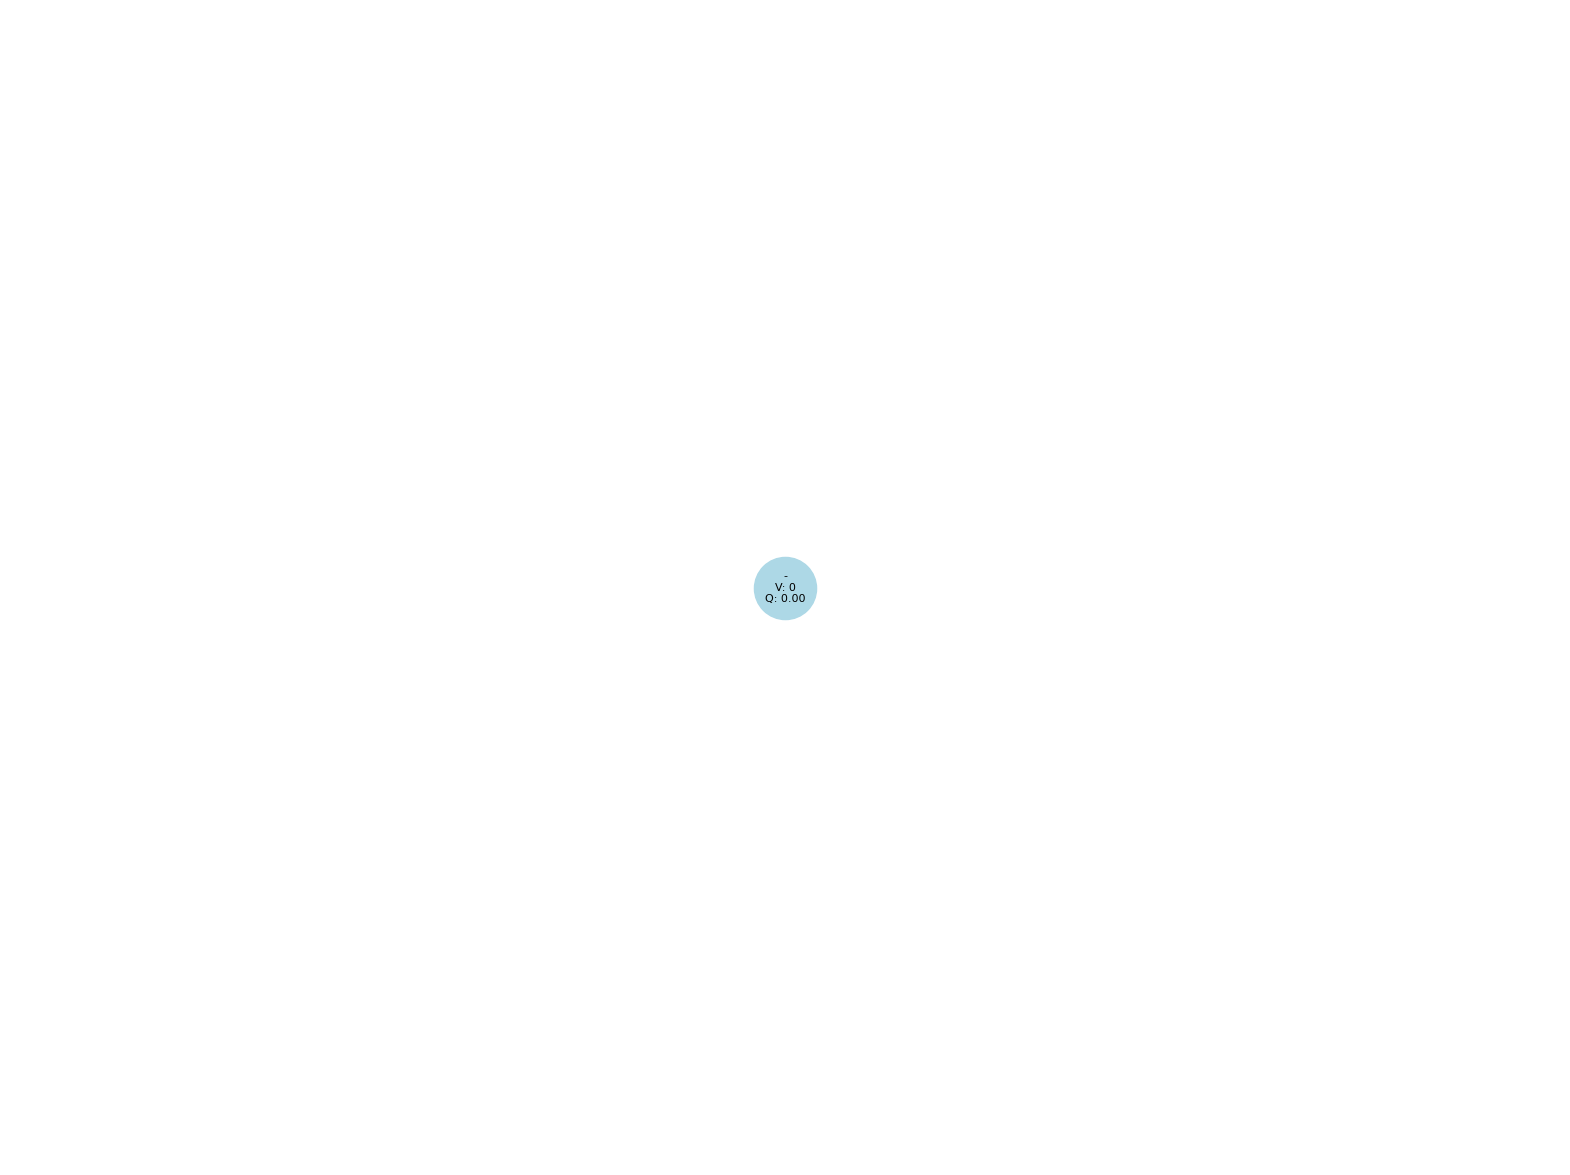

In [6]:
_, _ = visualize_tree(root)

In [7]:
root = monte_carlo_search(np.array([[2, 2, 4, 8], [2, 2, 64, 8], [2, 0, 4, 32], [0, 2, 0, 16]]), iterations=25)

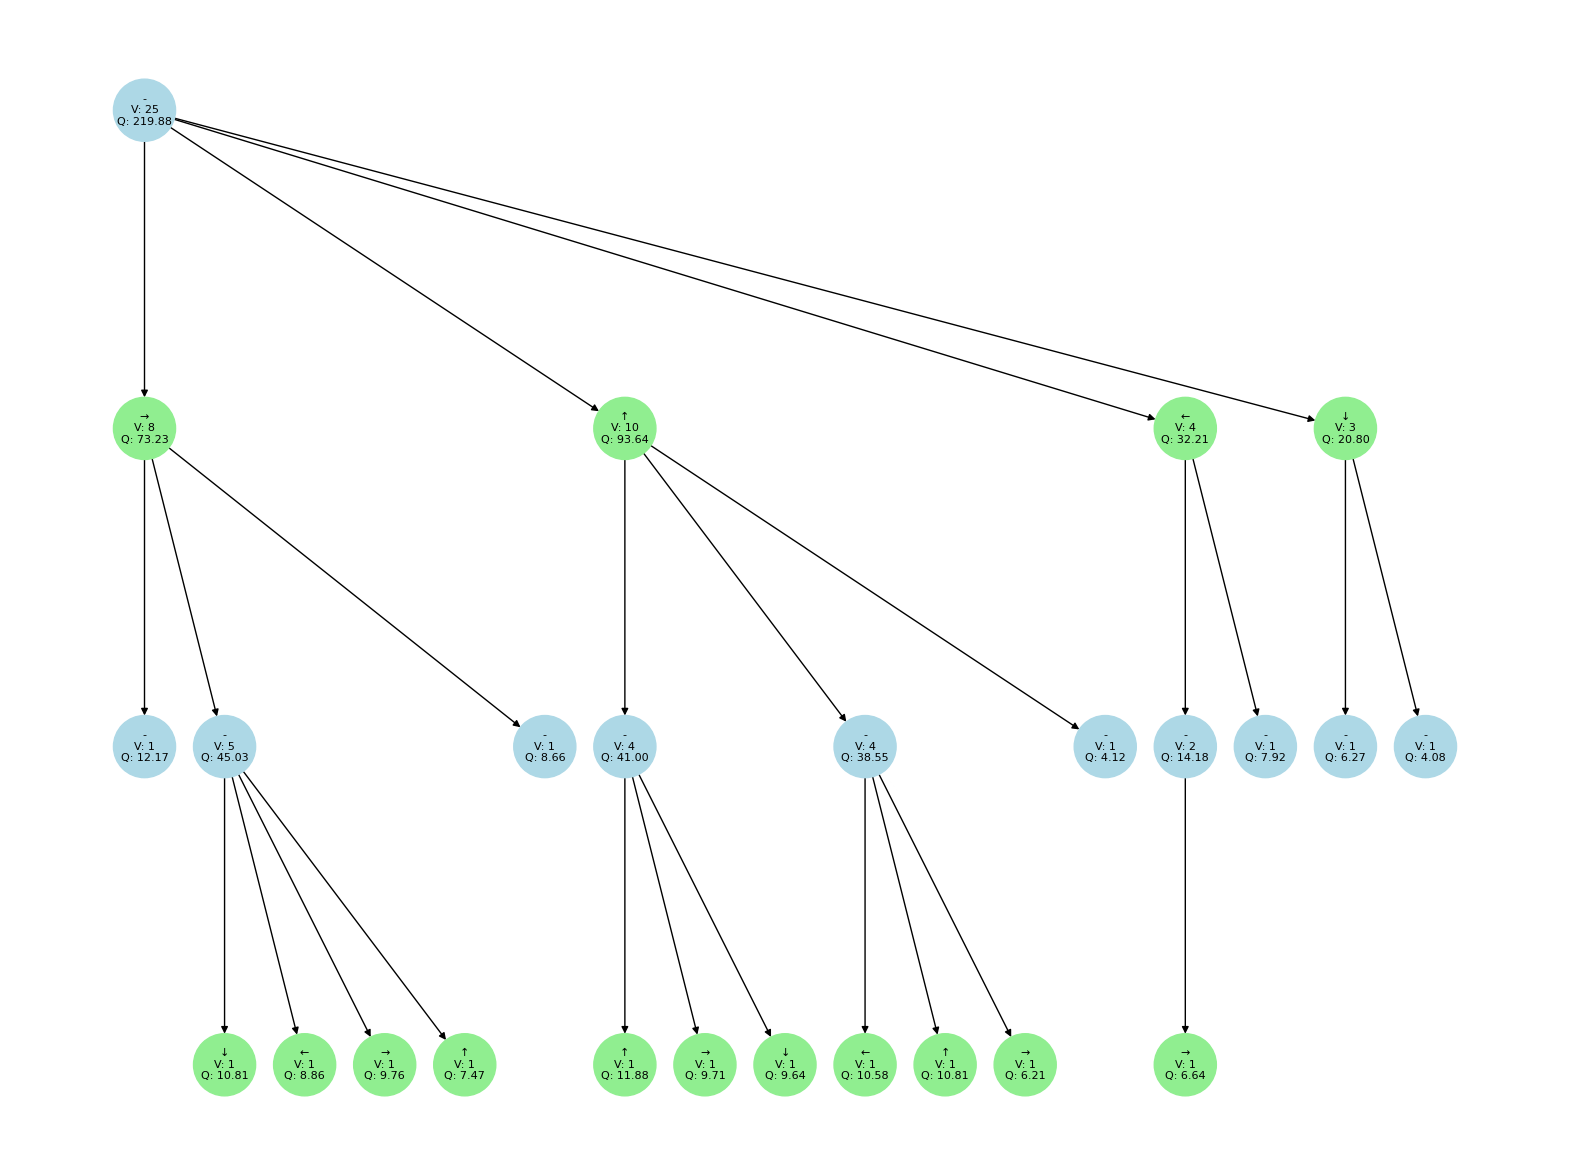

In [8]:
_, _ = visualize_tree(root)